In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the symbolic variables
M, m1, m2, l1, l2, g = sp.symbols('M m1 m2 l1 l2 g')
# Defining the A matrix for the linearized state-space representation
A = sp.Matrix([
[0, 1, 0, 0, 0, 0],
[0, 0, -(m1*g)/M, 0, -(m2*g)/M, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, -((M+m1)*g)/(M*l1), 0, -(m2*g)/(M*l1), 0],
[0, 0, 0, 0, 0, 1],
[0, 0, -(m1*g)/(M*l2), 0, -(g*(M+m2))/(M*l2), 0]
])
print("A: ",A)

# Defining the B matrix
B = sp.Matrix([0, 1/M, 0, 1/(M*l1), 0, 1/(M*l2)]).reshape(6, 1)
print("B: ",B)

# Constructing the controllability matrix
Ct = sp.Matrix.hstack(B, A*B, A**2*B, A**3*B, A**4*B, A**5*B)
print("Controllability Matrix: ",Ct)

# Simplifying and finding the determinant of the controllability matrix
det_Ct = sp.simplify(sp.det(Ct))
print("Determinant of the controllability matrix:",det_Ct)

rank_controllability = Ct.rank()
print("Rank of the controllability matrix:",rank_controllability)

# Checking for special case where pendulum_length1 equals pendulum_length2
Ct1 = Ct.subs(l1, l2)
print("For l1 = l2, the Controllability matrix is:", Ct1)

print("Rank of the new matrix:")
rank_Ct1 = Ct1.rank()
print(rank_Ct1)

# Displaying the system's controllability condition
if rank_Ct1 == rank_controllability:
  print("System is controllable as ranks are equal.")
else:
  print("System is not controllable as ranks are dissimilar.")

A:  Matrix([[0, 1, 0, 0, 0, 0], [0, 0, -g*m1/M, 0, -g*m2/M, 0], [0, 0, 0, 1, 0, 0], [0, 0, -g*(M + m1)/(M*l1), 0, -g*m2/(M*l1), 0], [0, 0, 0, 0, 0, 1], [0, 0, -g*m1/(M*l2), 0, -g*(M + m2)/(M*l2), 0]])
B:  Matrix([[0], [1/M], [0], [1/(M*l1)], [0], [1/(M*l2)]])
Controllability Matrix:  Matrix([[0, 1/M, 0, -g*m2/(M**2*l2) - g*m1/(M**2*l1), 0, (M*g**2*l1*m2 + g**2*l1*m2**2 + g**2*l2*m1*m2)/(M**3*l1*l2**2) + (M*g**2*l2*m1 + g**2*l1*m1*m2 + g**2*l2*m1**2)/(M**3*l1**2*l2)], [1/M, 0, -g*m2/(M**2*l2) - g*m1/(M**2*l1), 0, (M*g**2*l1*m2 + g**2*l1*m2**2 + g**2*l2*m1*m2)/(M**3*l1*l2**2) + (M*g**2*l2*m1 + g**2*l1*m1*m2 + g**2*l2*m1**2)/(M**3*l1**2*l2), 0], [0, 1/(M*l1), 0, -g*m2/(M**2*l1*l2) + (-M*g - g*m1)/(M**2*l1**2), 0, (M*g**2*l1*m2 + M*g**2*l2*m2 + g**2*l1*m2**2 + g**2*l2*m1*m2)/(M**3*l1**2*l2**2) + (M**2*g**2*l2 + 2*M*g**2*l2*m1 + g**2*l1*m1*m2 + g**2*l2*m1**2)/(M**3*l1**3*l2)], [1/(M*l1), 0, -g*m2/(M**2*l1*l2) + (-M*g - g*m1)/(M**2*l1**2), 0, (M*g**2*l1*m2 + M*g**2*l2*m2 + g**2*l1*m2**2 + g*

In [ ]:
def observability_matrix(A, C):
  """
  Compute the observability matrix for the system (A, C).
  """
  obs_matrix = C
  for i in range(1, A.shape[0]):
    obs_matrix = np.vstack((obs_matrix, C @ np.linalg.matrix_power(A, i)))
  return obs_matrix

In [ ]:
C_matrices = {
r'x': np.array([[1, 0, 0, 0, 0, 0]]),
r'theta_1 and theta_2': np.array([[0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0]]),
r'x and theta_2': np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0]]),
r'x, theta_1 and theta_2': np.array([[1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0]])
}

In [ ]:
import numpy as np
import sympy as sp

# Defining symbols for parameters
M, m1, m2, l1, l2, g = sp.symbols('M m1 m2 l1 l2 g')

M = 1000
m1 = 100
m2 = 100
l1 = 20
l2 = 10
g = 9.81

# Defining the A matrix for the linearized state-space representation
A = sp.Matrix([
    [0, 1, 0, 0, 0, 0],
    [0, 0, -(m1 * g) / M, 0, -(m2 * g) / M, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, ((M + m1) * g) / (M * l1), 0, -(m2 * g) / (M * l1), 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, -(m1 * g) / (M * l2), 0, -(g * (M + m2)) / (M * l2), 0]
])

# Creating the C matrices for different output vectors
C_matrices = {
    r'x': np.array([[1, 0, 0, 0, 0, 0]]),
    r'theta_1 and theta_2': np.array([[0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0]]),
    r'x and theta_2': np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0]]),
    r'x, theta_1 and theta_2': np.array([[1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0]])
}

# Function to compute the observability matrix Ct
def compute_Ct(A, C):
    C_matrix = sp.Matrix(C)  # Convert numpy array to sympy Matrix for compatibility
    O_matrix = C_matrix  # Start with the first C matrix
    for i in range(1, 6):  # Compute A^i * C and horizontally stack them
        O_matrix = O_matrix.col_join(C_matrix * A**i)
        # Multiply A^i with C
    return O_matrix

# Calculate Ct for each value of C in C_matrices
Ct_results = {}
for output, C_matrix in C_matrices.items():
    Ct_results[output] = compute_Ct(A, C_matrix)

# Calculating and printing the shapes of the observability matrices
observability_shapes = {}
for output, C_matrix in C_matrices.items():
    Ct = compute_Ct(A, C_matrix)
    shape = Ct.shape  # Get the shape of the observability matrix
    observability_shapes[output] = shape

# Displaying the shapes
print(observability_shapes)

# Displaying the results
for output, Ct in Ct_results.items():
    # print(f"Ct for {output}:")
    # sp.pprint(Ct)
    print(" ")

# Calculate Ct and rank for each value of C in C_matrices
rank_results = {}
for output, C_matrix in C_matrices.items():
    Ct = compute_Ct(A, C_matrix)
    rank = Ct.rank()  # Using sympy's rank() method to get the rank of the matrix
    rank_results[output] = rank

# Displaying the results with rephrased output
for output, rank in rank_results.items():
    print(f"--- Observability Analysis for Output: {output} ---")
    print(f"Rank of the observability matrix: {rank}")

    # Checking if the system is observable
    if rank == 6:
        print(f"Outcome: The system is observable when the output {output} is considered.")
    else:
        print(f"Outcome: The system is not observable when the output {output} is considered.")

    print("=" * 60)  # Separator line for better readability


{'x': (6, 6), 'theta_1 and theta_2': (12, 6), 'x and theta_2': (12, 6), 'x, theta_1 and theta_2': (18, 6)}
 
 
 
 
--- Observability Analysis for Output: x ---
Rank of the observability matrix: 6
Outcome: The system is observable when the output x is considered.
--- Observability Analysis for Output: theta_1 and theta_2 ---
Rank of the observability matrix: 4
Outcome: The system is not observable when the output theta_1 and theta_2 is considered.
--- Observability Analysis for Output: x and theta_2 ---
Rank of the observability matrix: 6
Outcome: The system is observable when the output x and theta_2 is considered.
--- Observability Analysis for Output: x, theta_1 and theta_2 ---
Rank of the observability matrix: 6
Outcome: The system is observable when the output x, theta_1 and theta_2 is considered.


[[ 100.          503.15941502   60.55441897 -232.76642501   94.90449996
   -54.28158322]]
Closed-loop eigenvalues:
Eigenvalue 1: -0.2066 + 0.2023j
Eigenvalue 2: -0.2066 + -0.2023j
Eigenvalue 3: -0.0245 + 1.0421j
Eigenvalue 4: -0.0245 + -1.0421j
Eigenvalue 5: -0.0120 + 0.7276j
Eigenvalue 6: -0.0120 + -0.7276j


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

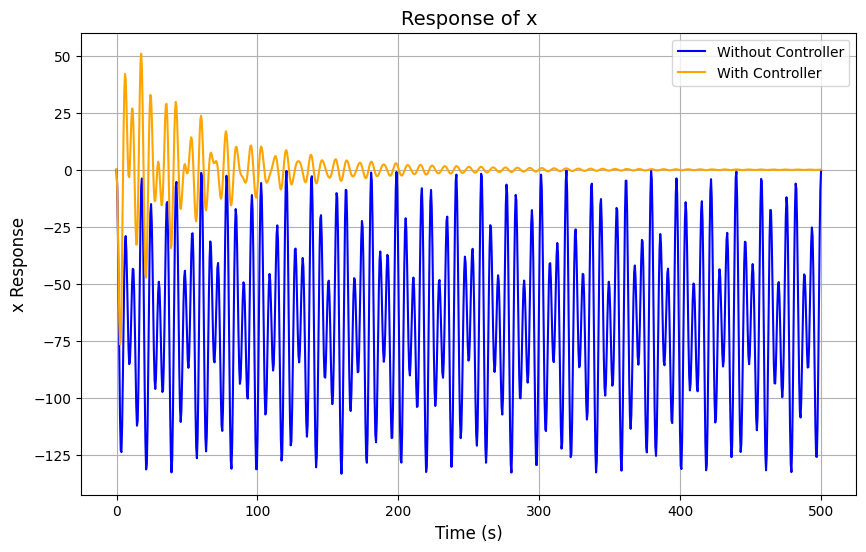

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

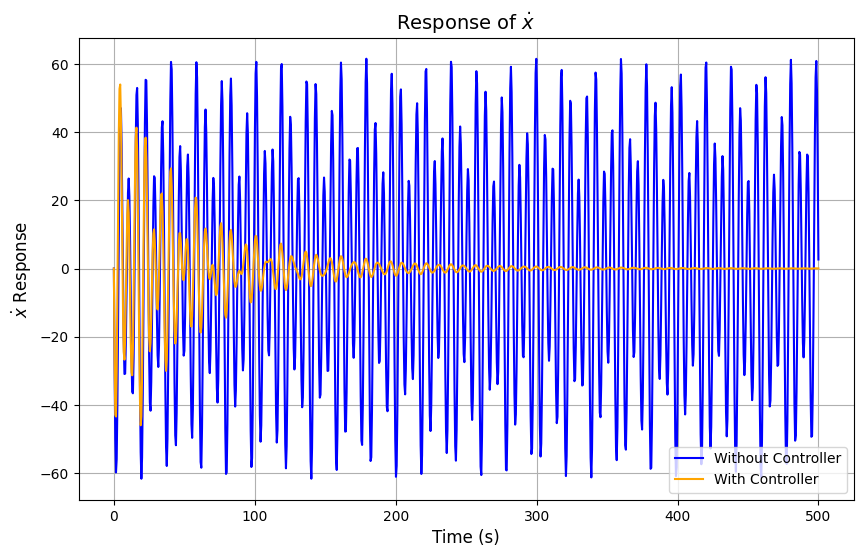

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

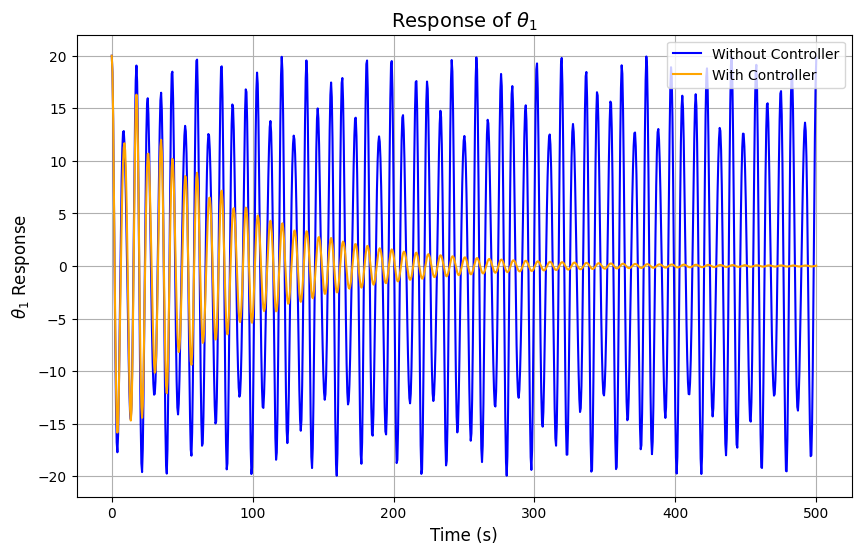

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

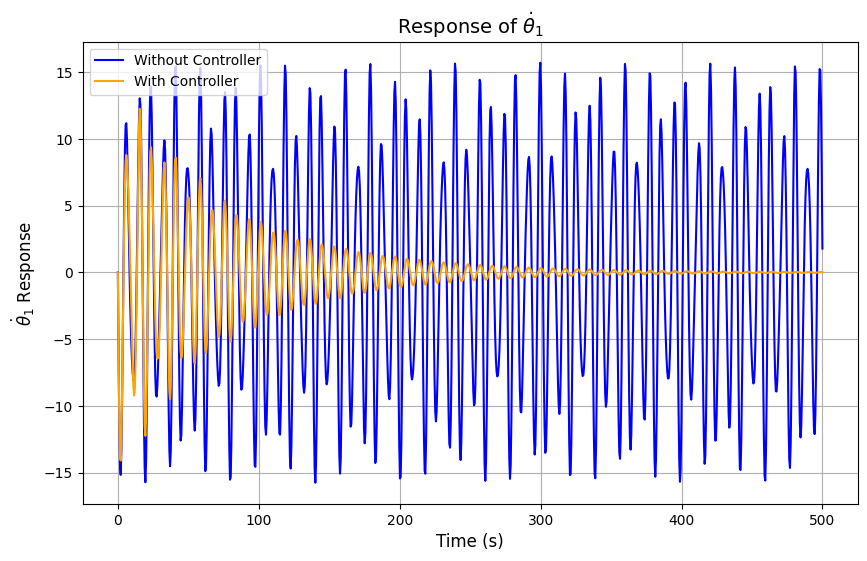

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

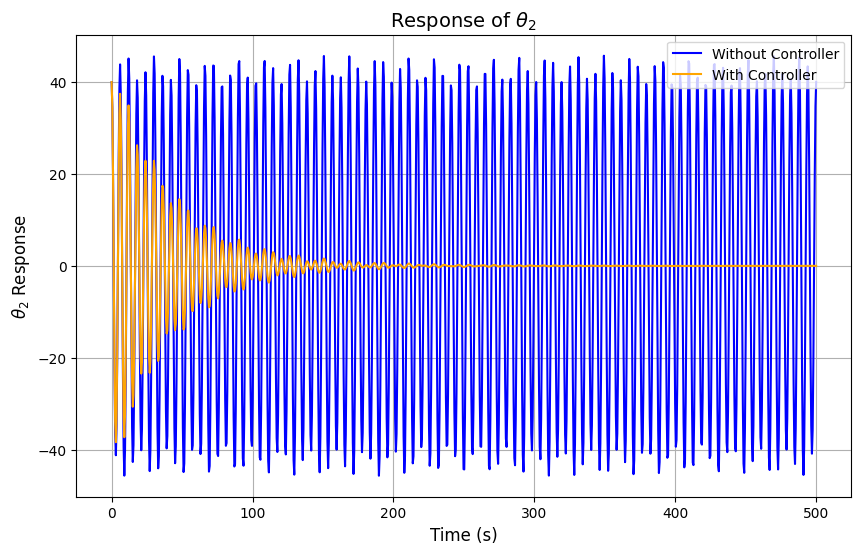

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

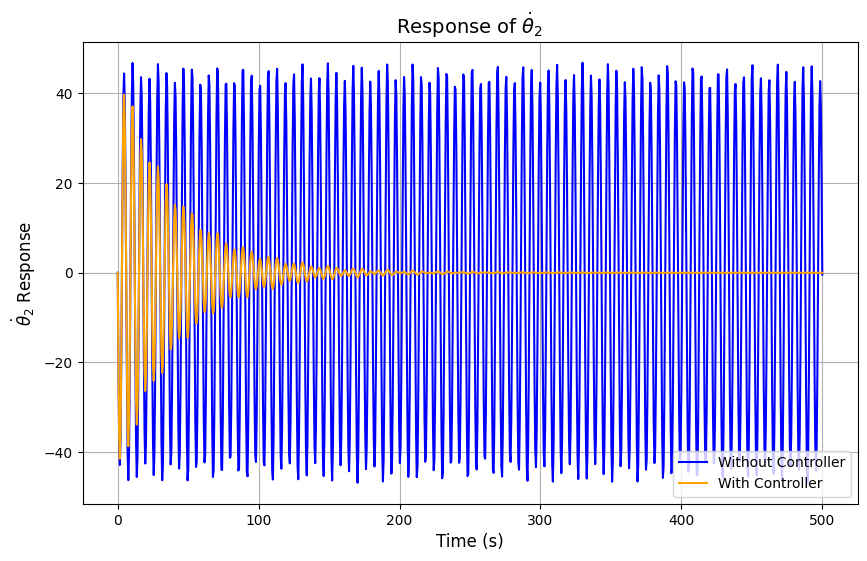

In [ ]:
import numpy as np
from scipy import signal
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt
from scipy.signal import lsim

# Define system parameters
M = 1000  # Mass of the cart
m1 = 100  # Mass of Pendulum 1
m2 = 100  # Mass of Pendulum 2
l1 = 20   # Length of the string of Pendulum 1
l2 = 10   # Length of the string of Pendulum 2
g = 9.81  # Gravity

A = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, -(m1 * g) / M, 0, -(m2 * g) / M, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, -((M + m1) * g) / (M * l1), 0, -(m2 * g) / (M * l1), 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, -(m1 * g) / (M * l2), 0, -(g * (M + m2)) / (M * l2), 0]
])

B = np.array([[0], [1 / M], [0], [1 / (M * l1)], [0], [1 / (M * l2)]])
C = np.eye(6)
D = np.zeros((6, 1))

# LQR Weights
Q = np.diag([100, 100, 1000, 1000, 1000, 1000])
R = np.array([[0.01]])

# Solve LQR
P = solve_continuous_are(A, B, Q, R)
K = np.dot(np.linalg.inv(R), np.dot(B.T, P))
print(K)
# Closed-loop system
A_cl = A - np.dot(B, K)
# Closed-loop system
A_cl = A - np.dot(B, K)

# Calculate eigenvalues of the closed-loop system
eigenvalues = np.linalg.eigvals(A_cl)
print("Closed-loop eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues, start=1):
    print(f"Eigenvalue {i}: {eigenvalue.real:.4f} + {eigenvalue.imag:.4f}j")



# Simulation
x_initial = np.array([0, 0, 20, 0, 40, 0])  # Initial state
t = np.linspace(0, 500, 1000)
u = np.zeros_like(t)

# Without Controller
sys1 = signal.StateSpace(A, B, C, D)
_, y1, x1 = lsim(sys1, U=u, T=t, X0=x_initial)

# With Controller
sys2 = signal.StateSpace(A_cl, B, C, D)
_, y2, x2 = lsim(sys2, U=u, T=t, X0=x_initial)

# Plotting
# Plotting each state variable in a separate figure
# Plotting each state variable in a separate figure
# Plotting each state variable in a separate figure
state_vars = ['x', '$\\dot{x}$', '$\\theta_1$', '$\\dot{\\theta}_1$', '$\\theta_2$', '$\\dot{\\theta}_2$']

for i, var in enumerate(state_vars):
    # Create a new figure for each state variable
    plt.figure(figsize=(10, 6))

    # Plot response without controller (blue) and with controller (orange)
    plt.plot(t, x1[:, i], color='blue', label='Without Controller')
    plt.plot(t, x2[:, i], color='orange', label='With Controller')

    # Add titles and labels
    plt.title(f'Response of {var}', fontsize=14)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel(f'{var} Response', fontsize=12)
    plt.grid(True)
    plt.legend(fontsize=10)

    # Save the plot for each state variable
    filename = f'response_var_{i + 1}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    # Download the plot in Colab
    from google.colab import files
    files.download(filename)
    plt.show()

A = 
B = 
P = 
K = 
Initial conditions = 


<ipython-input-25-df7080901a7a>:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dydt[1] = (F


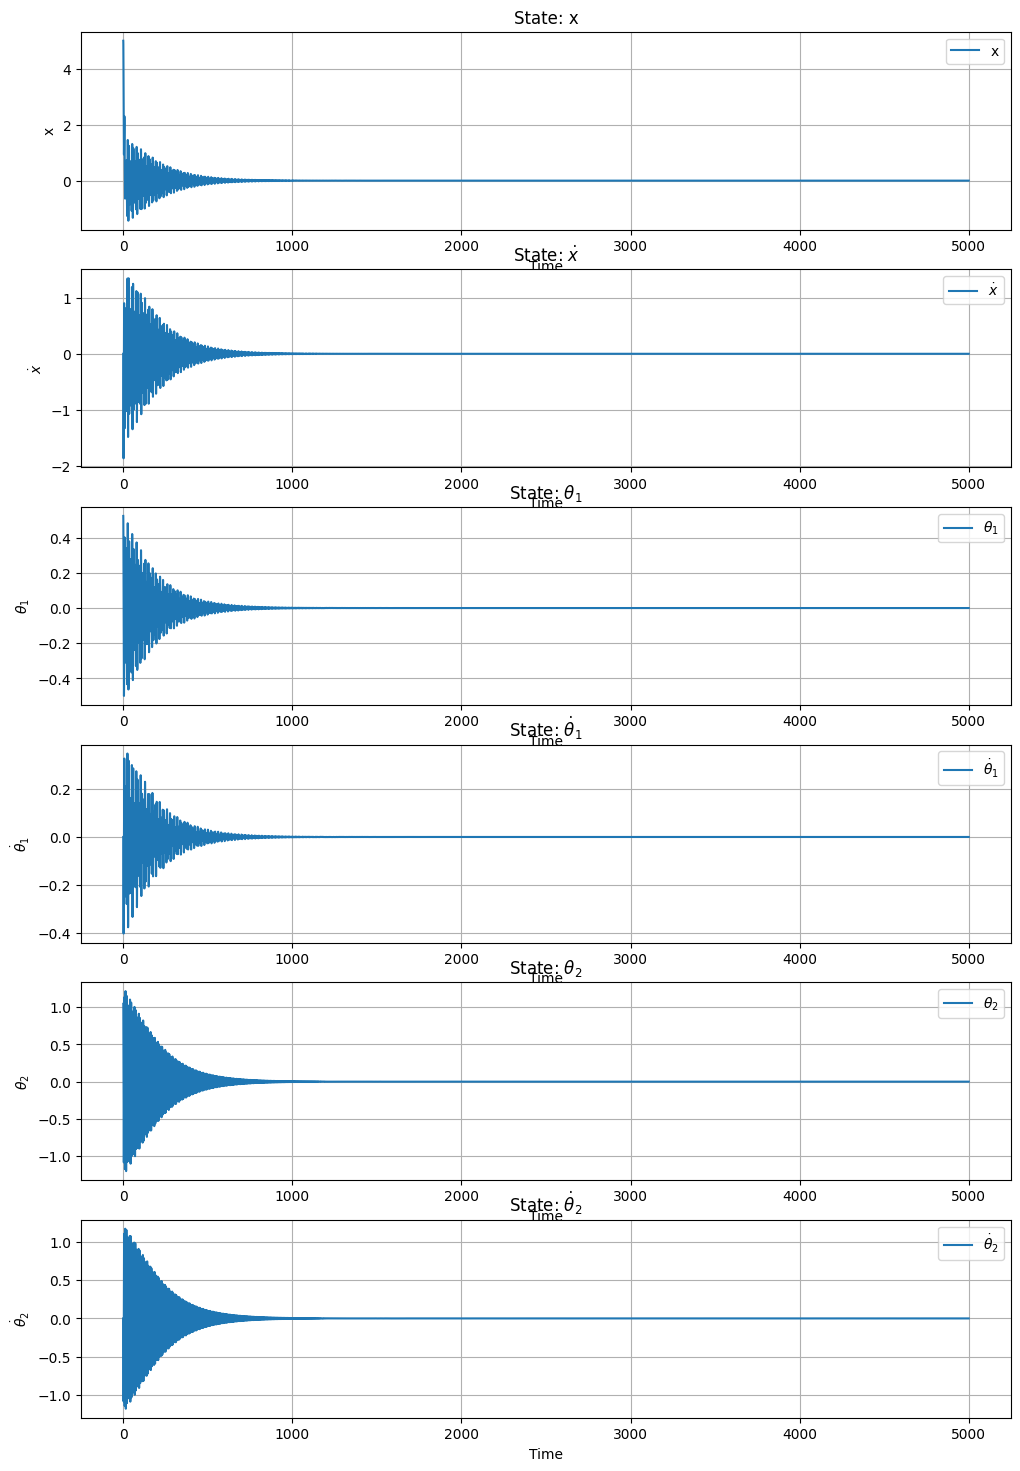

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt
# 1. Define system parameters
M = 1000 # Mass of the cart
m1 = 100 # Mass of Pendulum 1
m2 = 100 # Mass of Pendulum 2
l1 = 20 # Length of the string of Pendulum 1
l2 = 10 # Length of the string of Pendulum 2
g = 9.81 # Acceleration due to gravity (m/s^2)
# Define the LQR parameters
Q = np.diag([1000, 100, 1000, 1000, 100, 100])
R = np.array([[0.1]])
A = np.array([[0, 1, 0, 0, 0, 0],
 [0, 0, -(m1*g)/M, 0, -(m2*g)/M, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, -((M+m1)*g)/(M*l1), 0, -(m2*g)/(M*l1), 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, -(m1*g)/(M*l2), 0, -(g*(M+m2))/(M*l2), 0]])
print("A = ")
A

B = np.array([[0], [1/M], [0], [1/(M*l1)], [0], [1/(M*l2)]])
print("B = ")
B
P = solve_continuous_are(A, B, Q, R)
print("P = ")
P
K_val = np.dot(np.linalg.inv(R), np.dot(B.T, P))
print("K = ")
K_val

y0 = np.array([5, 0, np.radians(30), 0, np.radians(60), 0])
print("Initial conditions = ")
y0
def double_pendulum_dynamics(t, y):
    """
    Computes the derivatives of the state vector for a double pendulum on a cart.

    Parameters:
    t : float
        Current time (not used in equations but required for solvers)
    y : ndarray
        State vector [x, x_dot, theta1, theta1_dot, theta2, theta2_dot]

    Returns:
    dydt : ndarray
        Derivatives of the state vector
    """
    # Compute the control force (using an LQR feedback gain)
    F = -np.dot(K_val, y)

    # Initialize the derivative array
    dydt = np.zeros(6)

    # Dynamics of the system
    dydt[0] = y[1]  # dx/dt = x_dot
    dydt[1] = (F
               - (g / 2) * (m1 * np.sin(2 * y[2]) + m2 * np.sin(2 * y[4]))
               - (m1 * l1 * y[3]**2 * np.sin(y[2]))
               - (m2 * l2 * y[5]**2 * np.sin(y[4]))) / (M + m1 * np.sin(y[2])**2 + m2 * np.sin(y[4])**2)
    dydt[2] = y[3]  # dtheta1/dt = theta1_dot
    dydt[3] = (dydt[1] * np.cos(y[2]) - g * np.sin(y[2])) / l1  # dtheta1_dot/dt
    dydt[4] = y[5]  # dtheta2/dt = theta2_dot
    dydt[5] = (dydt[1] * np.cos(y[4]) - g * np.sin(y[4])) / l2  # dtheta2_dot/dt

    return dydt

# Time span
tspan = (0, 5000)
t_eval = np.arange(0, 5000, 0.01)
# Solve the differential equations
sol = solve_ivp(double_pendulum_dynamics, tspan, y0, t_eval=t_eval)
plt.figure(figsize=(12, 18))
state_labels = ['x', '$\\dot{x}$', '$\\theta_1$', '$\\dot{\\theta}_1$', '$\\theta_2$', '$\\dot{\\theta}_2$']
for i in range(sol.y.shape[0]):
 plt.subplot(len(state_labels), 1, i+1)
 plt.plot(sol.t, sol.y[i], label=state_labels[i])
 plt.title(f'State: {state_labels[i]}')
 plt.xlabel('Time')
 plt.ylabel(state_labels[i])
 plt.legend()
 plt.grid(True)
#  plt.tight_layout()
plt.show()

In [ ]:
pip install control

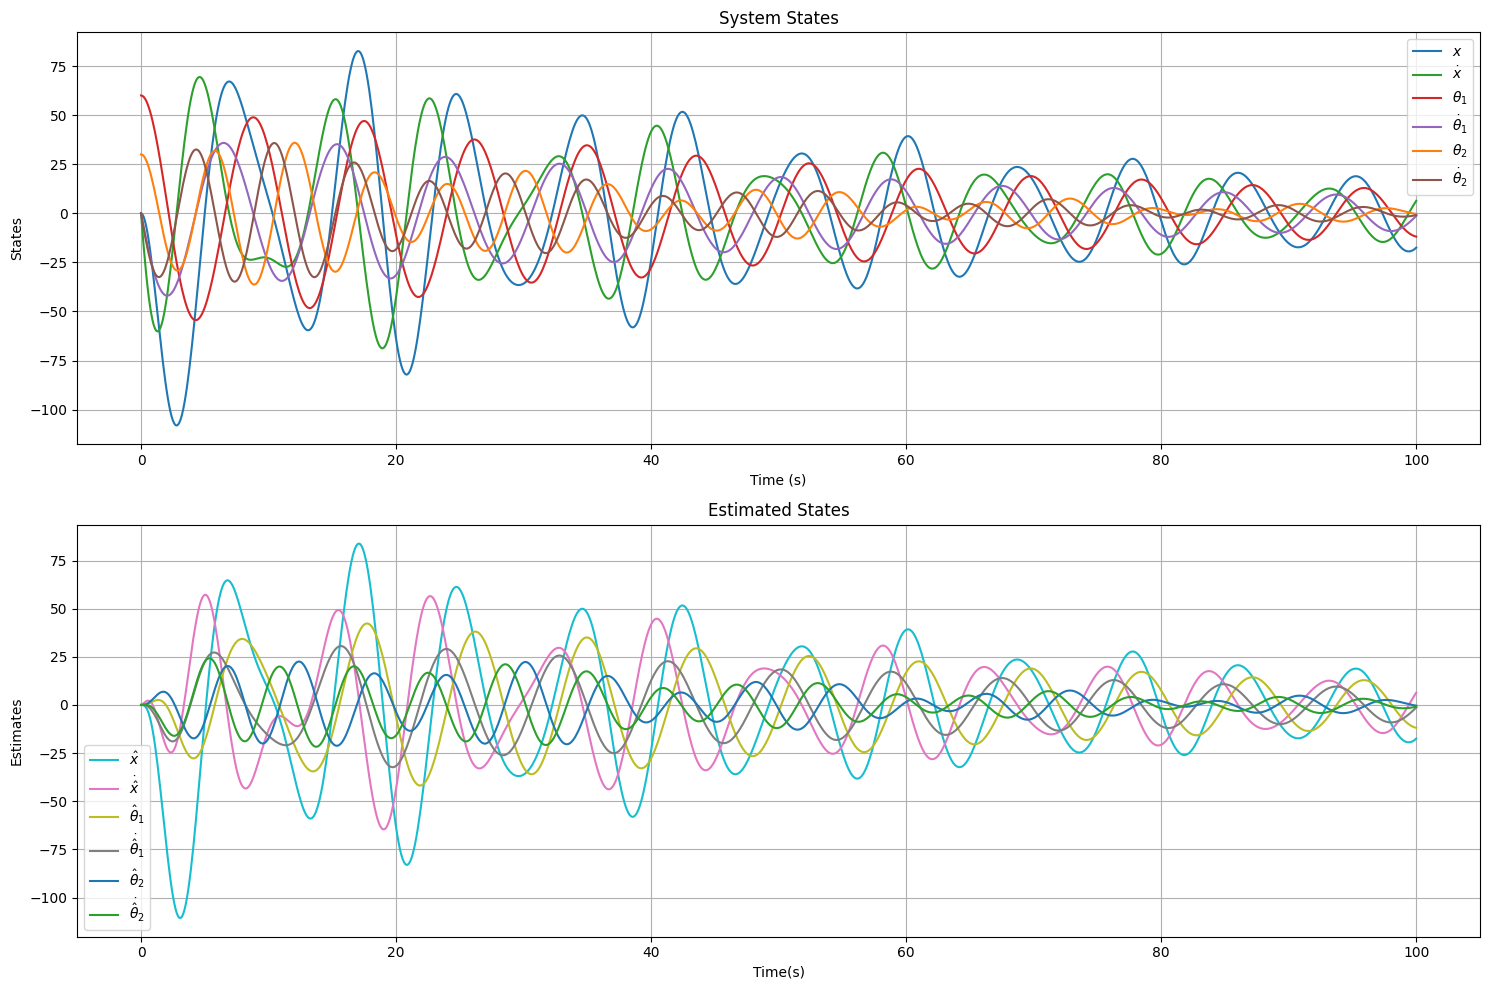

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import control as ctrl

# Define system parameters
M = 1000      # Mass of the cart
m1 = 100      # Mass of Pendulum 1
m2 = 100      # Mass of Pendulum 2
l1 = 20       # Length of the string of Pendulum 1
l2 = 10       # Length of the string of Pendulum 2
g = 9.81      # Acceleration due to gravity (m/s^2)

# State-space model matrices for the system
# A_matrix represents the system dynamics and B_matrix represents the control input
A_matrix = np.array([[0, 1, 0, 0, 0, 0],
                     [0, 0, -(m1 * g) / M, 0, -(m2 * g) / M, 0],
                     [0, 0, 0, 1, 0, 0],
                     [0, 0, -((M + m1) * g) / (M * l1), 0, -(m2 * g) / (M * l1), 0],
                     [0, 0, 0, 0, 0, 1],
                     [0, 0, -(m1 * g) / (M * l2), 0, -((M + m2) * g) / (M * l2), 0]])

B_matrix = np.array([[0], [1 / M], [0], [1 / (M * l1)], [0], [1 / (M * l2)]])

# C_matrix represents the output matrix for position (x)
C_matrix = np.array([[1, 0, 0, 0, 0, 0]])

# LQR state cost matrix (Q) and control cost value (R)
Q_matrix = np.diag([1000, 1000, 1000, 1000, 1000, 1000])  # Weighting on states
R_value = 0.01  # Control cost for LQR

# Compute the LQR controller gain (K_matrix) and Kalman filter gain (K_filter)
K_matrix, _, _ = ctrl.lqr(A_matrix, B_matrix, Q_matrix, R_value)

# Define process and measurement noise covariance matrices
process_noise = 0.3 * np.eye(6)  # Process noise covariance matrix (for Kalman filter)
measurement_noise = 1  # Measurement noise covariance matrix (for Kalman filter)

# Compute Kalman filter gain for state estimation (Luenberger observer)
K_filter = ctrl.lqr(A_matrix.T, C_matrix.T, process_noise, measurement_noise)[0].T

# Define the system dynamics for LQG control and estimation
def lqg_dynamics(state, time):
    # Extract system states from the input vector
    system_state = state[:6]
    estimated_state = state[6:12]

    # Compute the control input using LQR law: u = -K*x
    control_input = -K_matrix @ system_state

    # Estimator dynamics using Kalman filter
    estimator_dynamics = A_matrix @ estimated_state + B_matrix @ control_input + K_filter @ (C_matrix @ system_state - C_matrix @ estimated_state)

    # System dynamics without estimator
    system_dynamics = A_matrix @ system_state + B_matrix @ control_input

    # Return the concatenated system and estimator dynamics (6 states + 6 estimates)
    return np.concatenate((system_dynamics, estimator_dynamics))

# Initial conditions for the system states and their estimates
# Initial states for x, theta1, theta2 and their derivatives; initial estimates are zeros
initial_conditions = np.array([0, 0, 60, 0, 30, 0, 0, 0, 0, 0, 0, 0])

# Time span for the simulation (from 0 to 100 seconds with 1001 time steps)
time_span = np.linspace(0, 100, 1001)

# Integrate the system using odeint to solve the differential equations
state_trajectory = odeint(lqg_dynamics, initial_conditions, time_span)

# Create a figure for plotting the results
plt.figure(figsize=(15, 10))

# Define colors for the states (system and estimated states)
system_colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:orange', 'tab:brown']
estimate_colors = ['tab:cyan', 'tab:pink', 'tab:olive', 'tab:gray', 'tab:blue', 'tab:green']

# Plot for system states (actual system states)
plt.subplot(2, 1, 1)
for i in range(6):
    plt.plot(time_span, state_trajectory[:, i], label=r'$\mathbf{x_' + str(i+1) + '}$', color=system_colors[i])  # Color each state line
plt.title('System States')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.legend(loc='best')
plt.legend(['$x$', '$\dot{x}$', '$\\theta_1$', '$\dot{\\theta}_1$', '$\\theta_2$','$\dot{\\theta}_2$'])
plt.grid(True)

# Plot for estimated states (state estimates from the observer)
plt.subplot(2, 1, 2)
for i in range(6):
    plt.plot(time_span, state_trajectory[:, i + 6], label=r'$\hat{\mathbf{x}_' + str(i+1) + '}$', color=estimate_colors[i])  # Color each estimate line
plt.title('Estimated States')
plt.xlabel('Time(s)')
plt.ylabel('Estimates')
plt.legend(loc='best')
plt.legend(['$\hat{x}$', '$\dot{\hat{x}}$', '$\hat{\\theta}_1$', '$\dot{\hat{\\theta}}_1$', '$\hat{\\theta}_2$','$\dot{\hat{\\theta}}_2$'])
plt.grid(True)

# Adjust layout to avoid overlap and show plots
plt.tight_layout()
plt.show()


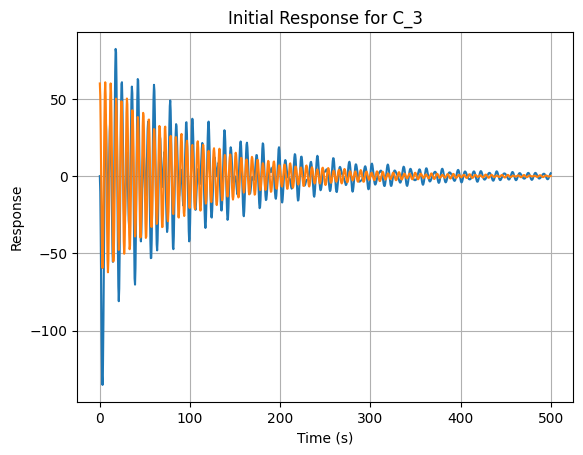

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import place_poles
import control as ctrl

# System Parameters
M = 1000  # Mass of the Crane
m_1 = 100  # Mass of Load 1
m_2 = 100  # Mass of Load 2
l_1 = 20   # Length of the string of Load 1
l_2 = 10   # Length of the string of Load 2
g = 9.81   # Acceleration due to gravity

# Defining matrices
A = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, -(m_1 * g) / M, 0, -(m_2 * g) / M, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, -((M + m_1) * g) / (M * l_1), 0, -(m_2 * g) / (M * l_1), 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, -(m_1 * g) / (M * l_2), 0, -(g * (M + m_2)) / (M * l_2), 0]
])

B = np.array([[0], [1 / M], [0], [1 / (M * l_1)], [0], [1 / (M * l_2)]])

C_1 = np.array([[1, 0, 0, 0, 0, 0]])
C_3 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0]])
C_4 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0]])

D = np.array([[0],[0]])

Q = np.diag([100, 100, 100, 100, 100, 100])
R = np.array([[0.01]])

# LQR computation
K, _, _ = ctrl.lqr(A, B, Q, R)

# Pole placement for observer gains
poles = np.array([-1, -2, -3, -4, -5, -6])
L_1 = place_poles(A.T, C_1.T, poles).gain_matrix.T
L_3 = place_poles(A.T, C_3.T, poles).gain_matrix.T
L_4 = place_poles(A.T, C_4.T, poles).gain_matrix.T

# Luenberger observer matrices
A_c1 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_1 @ C_1]
])
B_c = np.vstack([B, np.zeros_like(B)])
C_c1 = np.hstack([C_1, np.zeros_like(C_1)])

A_c3 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_3 @ C_3]
])
C_c3 = np.hstack([C_3, np.zeros_like(C_3)])

A_c4 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_4 @ C_4]
])
C_c4 = np.hstack([C_4, np.zeros_like(C_4)])

# Initial conditions
x0 = np.array([0, 0, 30, 0, 60, 0, 0, 0, 0, 0, 0, 0])

# Simulate initial response for C_3
sys_3 = ctrl.ss(A_c3, B_c, C_c3, D)
time = np.linspace(0, 500, 1000)  # Simulation time
t, y = ctrl.initial_response(sys_3, time, x0)

# Plot initial response
plt.figure()
plt.plot(t, y.T)
plt.title('Initial Response for C_3')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.grid()
plt.show()

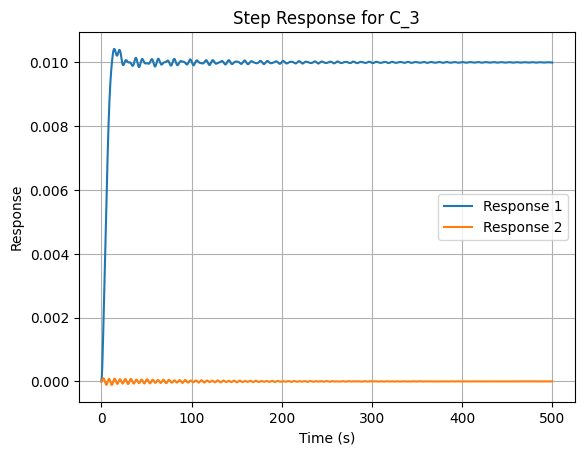

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import place_poles
import control as ctrl

# System Parameters
M = 1000  # Mass of the Crane
m_1 = 100  # Mass of Load 1
m_2 = 100  # Mass of Load 2
l_1 = 20   # Length of the string of Load 1
l_2 = 10   # Length of the string of Load 2
g = 9.81   # Acceleration due to gravity

# Defining matrices
A = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, -(m_1 * g) / M, 0, -(m_2 * g) / M, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, -((M + m_1) * g) / (M * l_1), 0, -(m_2 * g) / (M * l_1), 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, -(m_1 * g) / (M * l_2), 0, -(g * (M + m_2)) / (M * l_2), 0]
])

B = np.array([[0], [1 / M], [0], [1 / (M * l_1)], [0], [1 / (M * l_2)]])

C_1 = np.array([[1, 0, 0, 0, 0, 0]])
C_3 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0]])
C_4 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0]])

D = np.array([[0],[0]])

Q = np.diag([100, 100, 100, 100, 100, 100])
R = np.array([[0.01]])

# LQR computation
K, _, _ = ctrl.lqr(A, B, Q, R)

# Pole placement for observer gains
poles = np.array([-1, -2, -3, -4, -5, -6])
L_1 = place_poles(A.T, C_1.T, poles).gain_matrix.T
L_3 = place_poles(A.T, C_3.T, poles).gain_matrix.T
L_4 = place_poles(A.T, C_4.T, poles).gain_matrix.T

# Luenberger observer matrices
A_c1 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_1 @ C_1]
])
B_c = np.vstack([B, np.zeros_like(B)])
C_c1 = np.hstack([C_1, np.zeros_like(C_1)])

A_c3 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_3 @ C_3]
])
C_c3 = np.hstack([C_3, np.zeros_like(C_3)])

A_c4 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_4 @ C_4]
])
C_c4 = np.hstack([C_4, np.zeros_like(C_4)])

# Initial conditions
x0 = np.array([0, 0, 30, 0, 60, 0, 0, 0, 0, 0, 0, 0])

# Simulate step response for C_3
sys_3 = ctrl.ss(A_c3, B_c, C_c3, D)
time = np.linspace(0, 500, 1000)  # Simulation time
t, y = ctrl.step_response(sys_3, time)



# Plot step response
plt.figure()
for i in range(y.shape[0]):  # Iterate over rows
    plt.plot(t, y[i, :].T, label=f'Response {i+1}')  # Correct indexing
plt.title('Step Response for C_3')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.savefig('step_response_c3.png')
plt.show()


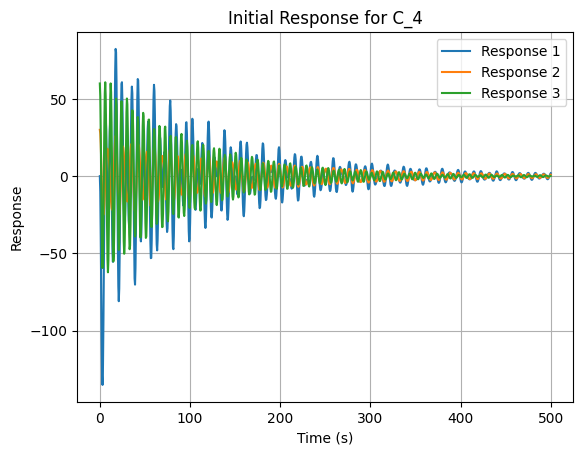

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import place_poles
import control as ctrl

# System Parameters
M = 1000  # Mass of the Crane
m_1 = 100  # Mass of Load 1
m_2 = 100  # Mass of Load 2
l_1 = 20   # Length of the string of Load 1
l_2 = 10   # Length of the string of Load 2
g = 9.81   # Acceleration due to gravity

# Defining matrices
A = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, -(m_1 * g) / M, 0, -(m_2 * g) / M, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, -((M + m_1) * g) / (M * l_1), 0, -(m_2 * g) / (M * l_1), 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, -(m_1 * g) / (M * l_2), 0, -(g * (M + m_2)) / (M * l_2), 0]
])

B = np.array([[0], [1 / M], [0], [1 / (M * l_1)], [0], [1 / (M * l_2)]])

C_1 = np.array([[1, 0, 0, 0, 0, 0]])
C_3 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0]])
C_4 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0]])

D = np.array([[0], [0],[0]])

Q = np.diag([100, 100, 100, 100, 100, 100])
R = np.array([[0.01]])

# LQR computation
K, _, _ = ctrl.lqr(A, B, Q, R)

# Pole placement for observer gains
poles = np.array([-1, -2, -3, -4, -5, -6])
L_1 = place_poles(A.T, C_1.T, poles).gain_matrix.T
L_3 = place_poles(A.T, C_3.T, poles).gain_matrix.T
L_4 = place_poles(A.T, C_4.T, poles).gain_matrix.T

# Luenberger observer matrices
A_c1 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_1 @ C_1]
])
B_c = np.vstack([B, np.zeros_like(B)])
C_c1 = np.hstack([C_1, np.zeros_like(C_1)])

A_c3 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_3 @ C_3]
])
C_c3 = np.hstack([C_3, np.zeros_like(C_3)])

A_c4 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_4 @ C_4]
])
C_c4 = np.hstack([C_4, np.zeros_like(C_4)])

# Initial conditions
x0 = np.array([0, 0, 30, 0, 60, 0, 0, 0, 0, 0, 0, 0])

# Simulate initial response for C_4
sys_4 = ctrl.ss(A_c4, B_c, C_c4, D)
time = np.linspace(0, 500, 1000)  # Simulation time
t, y = ctrl.initial_response(sys_4, time, x0)

# Plot initial response
plt.figure()
for i in range(y.shape[0]):  # Iterate over rows
    plt.plot(t, y[i, :], label=f'Response {i+1}')
plt.title('Initial Response for C_4')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.savefig('ini_response_c4.png')
plt.show()


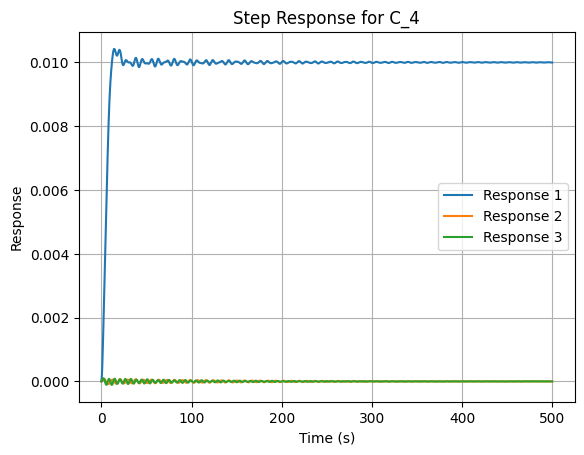

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import place_poles
import control as ctrl

# System Parameters
M = 1000  # Mass of the Crane
m_1 = 100  # Mass of Load 1
m_2 = 100  # Mass of Load 2
l_1 = 20   # Length of the string of Load 1
l_2 = 10   # Length of the string of Load 2
g = 9.81   # Acceleration due to gravity

# Defining matrices
A = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, -(m_1 * g) / M, 0, -(m_2 * g) / M, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, -((M + m_1) * g) / (M * l_1), 0, -(m_2 * g) / (M * l_1), 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, -(m_1 * g) / (M * l_2), 0, -(g * (M + m_2)) / (M * l_2), 0]
])

B = np.array([[0], [1 / M], [0], [1 / (M * l_1)], [0], [1 / (M * l_2)]])

C_1 = np.array([[1, 0, 0, 0, 0, 0]])
C_3 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0]])
C_4 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0]])

D = np.array([[0], [0],[0]])

Q = np.diag([100, 100, 100, 100, 100, 100])
R = np.array([[0.01]])

# LQR computation
K, _, _ = ctrl.lqr(A, B, Q, R)

# Pole placement for observer gains
poles = np.array([-1, -2, -3, -4, -5, -6])
L_1 = place_poles(A.T, C_1.T, poles).gain_matrix.T
L_3 = place_poles(A.T, C_3.T, poles).gain_matrix.T
L_4 = place_poles(A.T, C_4.T, poles).gain_matrix.T

# Luenberger observer matrices
A_c1 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_1 @ C_1]
])
B_c = np.vstack([B, np.zeros_like(B)])
C_c1 = np.hstack([C_1, np.zeros_like(C_1)])

A_c3 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_3 @ C_3]
])
C_c3 = np.hstack([C_3, np.zeros_like(C_3)])

A_c4 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_4 @ C_4]
])
C_c4 = np.hstack([C_4, np.zeros_like(C_4)])

# Initial conditions
x0 = np.array([0, 0, 30, 0, 60, 0, 0, 0, 0, 0, 0, 0])

# Simulate step response for C_4
sys_4 = ctrl.ss(A_c4, B_c, C_c4, D)
time = np.linspace(0, 500, 1000)  # Simulation time
t, y = ctrl.step_response(sys_4, time)

# Plot step response
plt.figure()
for i in range(y.shape[0]):  # Iterate over rows
    plt.plot(t, y[i, :].T, label=f'Response {i+1}')
plt.title('Step Response for C_4')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.savefig('step_c4.png')
plt.show()


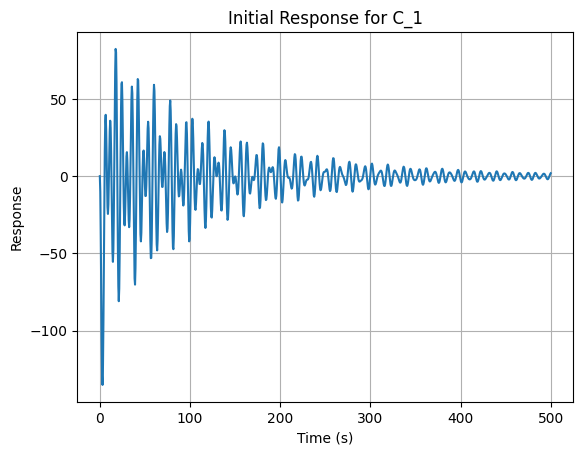

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import place_poles
import control as ctrl

# System Parameters
M = 1000  # Mass of the Crane
m_1 = 100  # Mass of Load 1
m_2 = 100  # Mass of Load 2
l_1 = 20   # Length of the string of Load 1
l_2 = 10   # Length of the string of Load 2
g = 9.81   # Acceleration due to gravity

# Defining matrices
A = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, -(m_1 * g) / M, 0, -(m_2 * g) / M, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, -((M + m_1) * g) / (M * l_1), 0, -(m_2 * g) / (M * l_1), 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, -(m_1 * g) / (M * l_2), 0, -(g * (M + m_2)) / (M * l_2), 0]
])

B = np.array([[0], [1 / M], [0], [1 / (M * l_1)], [0], [1 / (M * l_2)]])

C_1 = np.array([[1, 0, 0, 0, 0, 0]])
C_3 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0]])
C_4 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0]])

D = np.array([0])

Q = np.diag([100, 100, 100, 100, 100, 100])
R = np.array([[0.01]])

# LQR computation
K, _, _ = ctrl.lqr(A, B, Q, R)

# Pole placement for observer gains
poles = np.array([-1, -2, -3, -4, -5, -6])
L_1 = place_poles(A.T, C_1.T, poles).gain_matrix.T
L_3 = place_poles(A.T, C_3.T, poles).gain_matrix.T
L_4 = place_poles(A.T, C_4.T, poles).gain_matrix.T

# Luenberger observer matrices
A_c1 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_1 @ C_1]
])
B_c = np.vstack([B, np.zeros_like(B)])
C_c1 = np.hstack([C_1, np.zeros_like(C_1)])

A_c3 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_3 @ C_3]
])
C_c3 = np.hstack([C_3, np.zeros_like(C_3)])

A_c4 = np.block([
    [A - B @ K, B @ K],
    [np.zeros_like(A), A - L_4 @ C_4]
])
C_c4 = np.hstack([C_4, np.zeros_like(C_4)])

# Initial conditions
x0 = np.array([0, 0, 30, 0, 60, 0, 0, 0, 0, 0, 0, 0])

# Simulate initial response for C_3
sys_1 = ctrl.ss(A_c1, B_c, C_c1, D)
time = np.linspace(0, 500, 1000)  # Simulation time
t, y = ctrl.initial_response(sys_1, time, x0)

# Plot initial response
plt.figure()
plt.plot(t, y.T)
plt.title('Initial Response for C_1')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.grid()
plt.show()

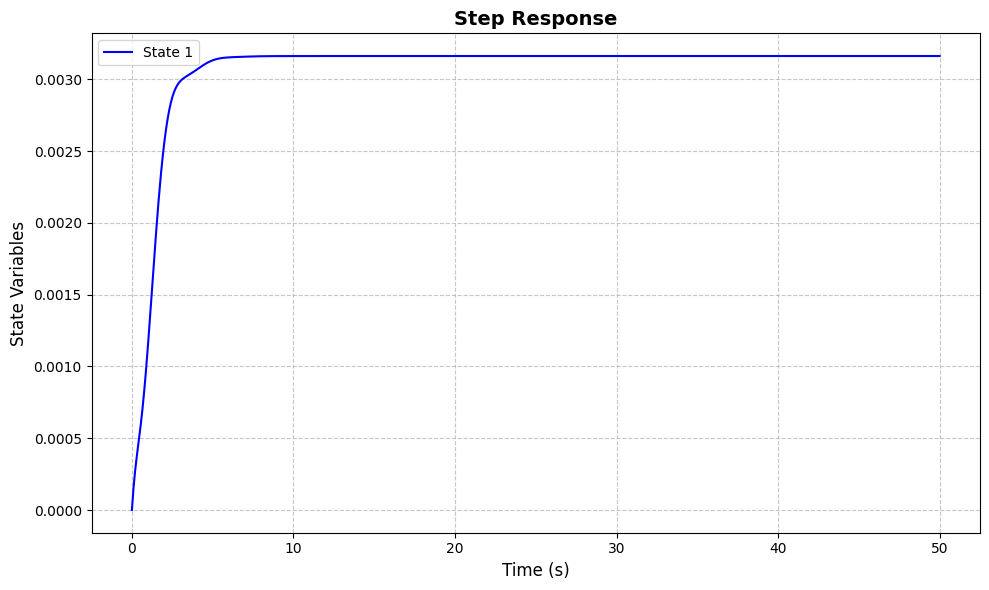

In [ ]:
import numpy as np
from scipy.linalg import solve_continuous_are
from scipy.signal import StateSpace, lsim
import matplotlib.pyplot as plt

# Define system matrices
M = 1  # Mass of the cart
m1 = 0.5  # Mass of pendulum 1
m2 = 0.5  # Mass of pendulum 2
g = 9.81  # Acceleration due to gravity
l1 = 1.0  # Length of pendulum 1
l2 = 1.0  # Length of pendulum 2

A = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, -(m1 * g) / M, 0, -(m2 * g) / M, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, -((M + m1) * g) / (M * l1), 0, -(m2 * g) / (M * l1), 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, -(m1 * g) / (M * l2), 0, -(g * (M + m2)) / (M * l2), 0]
])

B = np.array([[0], [1 / M], [0], [1 / (M * l1)], [0], [1 / (M * l2)]])

# Define cost matrices for LQR
Q = np.diag([100, 100, 100, 100, 100, 100])  # 6x6
R = np.array([[0.001]])  # 1x1

# Solve the LQR problem
P = solve_continuous_are(A, B, Q, R)  # Solve CARE
K = np.dot(np.linalg.inv(R), np.dot(B.T, P))

# Observability matrices
C1 = np.array([[1, 0, 0, 0, 0, 0]])
C3 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0]])
C4 = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0]])
D = np.array([[0]])

# Initial conditions for state and observer (12 state variables: 6 actual + 6 estimates)
x0 = np.array([4, 0, 30, 0, 60, 0, 0, 0, 0, 0, 0, 0])

# Define process and measurement noise
vd = 0.3 * np.eye(6)  # Process noise covariance (6x6)
vn1 = np.array([[1]])  # Measurement noise covariance for C1 (1x1)
vn3 = np.eye(2)        # Measurement noise covariance for C3 (2x2)
vn4 = np.eye(3)        # Measurement noise covariance for C4 (3x3)

# Kalman filter gain matrices
P1 = solve_continuous_are(A.T, C1.T, vd, vn1)
K_pop1 = np.dot(P1, C1.T) / np.trace(vn1)

P3 = solve_continuous_are(A.T, C3.T, vd, vn3)
K_pop3 = np.dot(P3, C3.T) / np.trace(vn3)

P4 = solve_continuous_are(A.T, C4.T, vd, vn4)
K_pop4 = np.dot(P4, C4.T) / np.trace(vn4)

# Observing state-space corresponding to C1 observable of the system
A_obs = np.block([
    [A - np.dot(B, K), np.dot(B, K)],
    [np.zeros_like(A), A - np.dot(K_pop1, C1)]
])

B_obs = np.block([
    [B],
    [np.zeros_like(B)]
])

C_obs = np.block([
    [C1, np.zeros_like(C1)]
])

D_obs = D

sys1 = StateSpace(A_obs, B_obs, C_obs, D_obs)

# Simulating the initial condition response
# Generate step response
time = np.linspace(0, 50, 1000)  # Define time vector
u = np.ones_like(time)  # Step input

_, yout, _ = lsim(sys1, U=u, T=time)  # Compute step response

# Plot step response
plt.figure(figsize=(10, 6))
custom_colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']  # Custom colors

if len(yout.shape) == 1:  # Single output state
    plt.plot(time, yout, label="State 1", color=custom_colors[0])
else:  # Multiple output states
    for i in range(yout.shape[1]):
        plt.plot(time, yout[:, i], label=f"State {i+1}", color=custom_colors[i % len(custom_colors)])

plt.title("Step Response", fontsize=14, fontweight="bold")
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("State Variables", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig("step_response_custom_colors.png", dpi=300)
plt.show()


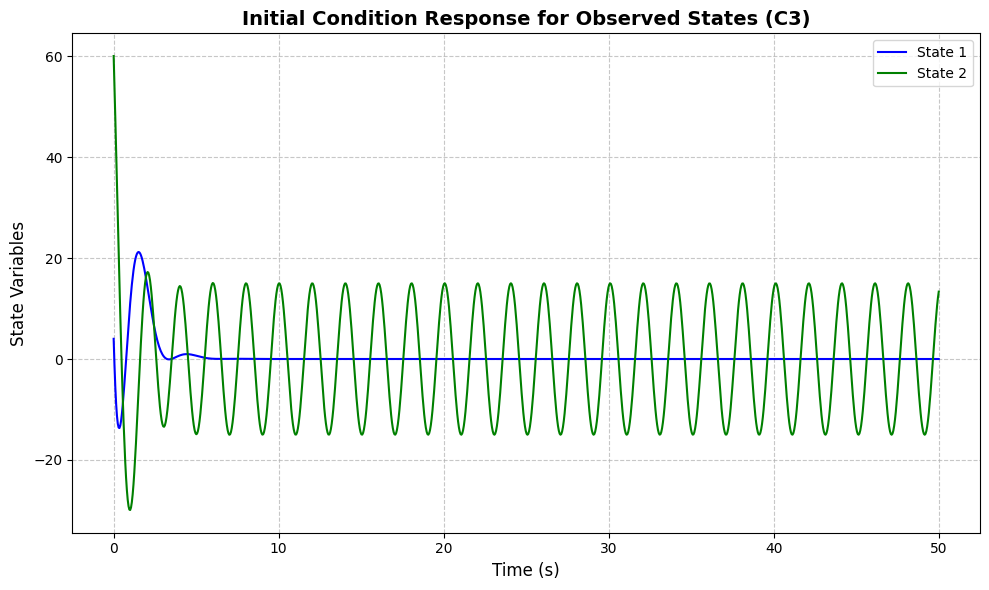

In [ ]:
# Observing state-space corresponding to C3 observable of the system
A_obs3 = np.block([
    [A - np.dot(B, K), np.dot(B, K)],
    [np.zeros_like(A), A - np.dot(K_pop3, C3)]
])

B_obs3 = np.block([
    [B],
    [np.zeros_like(B)]
])

C_obs3 = np.block([
    [C3, np.zeros_like(C3)]
])

D_obs3  = np.array([[0],[0]])


sys3 = StateSpace(A_obs3, B_obs3, C_obs3, D_obs3)

# Simulating the initial condition response for sys3
time = np.linspace(0, 50, 1000)  # Define time vector
_, yout3, _ = lsim(sys3, T=time, U=0, X0=x0)

# Plotting the response
plt.figure(figsize=(10, 6))
if len(yout3.shape) == 1:  # Single output state
    plt.plot(time, yout3, label="State 1", color="blue")
else:  # Multiple output states
    for i in range(yout3.shape[1]):
        plt.plot(time, yout3[:, i], label=f"State {i+1}", color=custom_colors[i % len(custom_colors)])

plt.title("Initial Condition Response for Observed States (C3)", fontsize=14, fontweight="bold")
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("State Variables", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig("initial_response_C3.png", dpi=300)
plt.show()


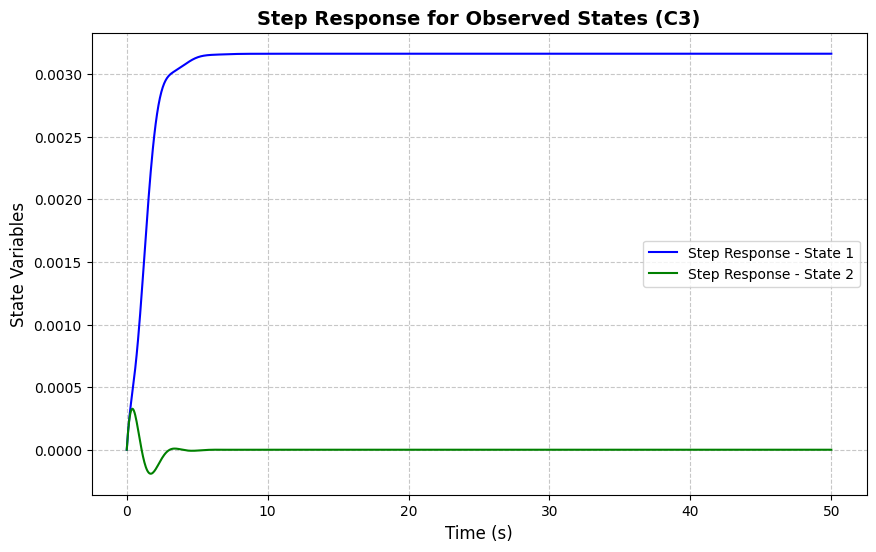

In [ ]:
# Simulating the step response for sys3
time = np.linspace(0, 50, 1000)  # Define time vector
u_step = np.ones_like(time)  # Step input

# Simulate step response with zero initial condition
_, step_response, _ = lsim(sys3, T=time, U=u_step, X0=np.zeros_like(x0_extended))

# Plotting the step response
plt.figure(figsize=(10, 6))
custom_colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']

if len(step_response.shape) == 1:  # Single output state
    plt.plot(time, step_response, label="Step Response - State 1", color="blue")
else:  # Multiple output states
    for i in range(step_response.shape[1]):
        plt.plot(time, step_response[:, i], label=f"Step Response - State {i+1}", color=custom_colors[i % len(custom_colors)])

plt.title("Step Response for Observed States (C3)", fontsize=14, fontweight="bold")
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("State Variables", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Save the plot
plt.savefig("step_response_C3.png", dpi=300)
plt.show()


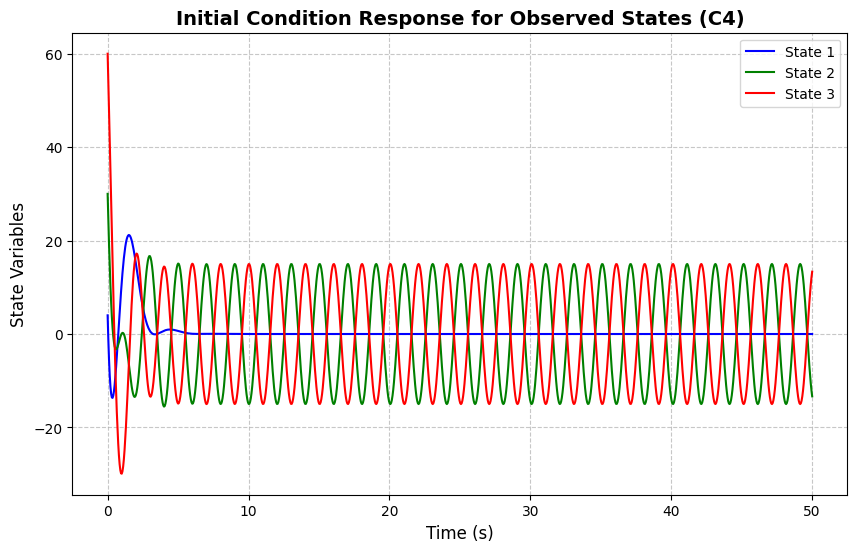

In [ ]:
# Observing state-space corresponding to C4 observable of the system
A_obs4 = np.block([
    [A - np.dot(B, K), np.dot(B, K)],
    [np.zeros_like(A), A - np.dot(K_pop4, C4)]
])

B_obs4 = np.block([
    [B],
    [np.zeros_like(B)]
])

C_obs4 = np.block([
    [C4, np.zeros_like(C4)]
])

D_obs4 = np.zeros((C4.shape[0], B_obs4.shape[1]))  # Ensure D matrix matches dimensions

sys4 = StateSpace(A_obs4, B_obs4, C_obs4, D_obs4)

# Simulating the initial condition response for sys4
time = np.linspace(0, 50, 1000)  # Define time vector
x0_extended = np.concatenate([x0[:6], np.zeros(6)])  # Extend initial conditions to match augmented state

_, yout4, _ = lsim(sys4, T=time, U=np.zeros_like(time), X0=x0_extended)

# Plotting the response
plt.figure(figsize=(10, 6))
custom_colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']

if len(yout4.shape) == 1:  # Single output state
    plt.plot(time, yout4, label="State 1", color="blue")
else:  # Multiple output states
    for i in range(yout4.shape[1]):
        plt.plot(time, yout4[:, i], label=f"State {i+1}", color=custom_colors[i % len(custom_colors)])

plt.title("Initial Condition Response for Observed States (C4)", fontsize=14, fontweight="bold")
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("State Variables", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Save the plot
plt.savefig("initial_response_C4.png", dpi=300)
plt.show()


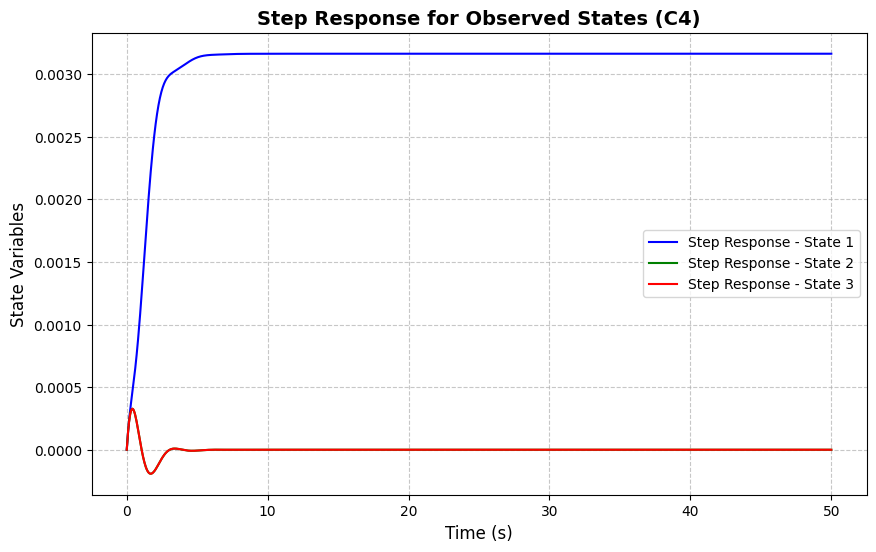

In [ ]:
# Simulating the step response for sys4
time = np.linspace(0, 50, 1000)  # Define time vector
u_step = np.ones_like(time)  # Step input

# Simulate step response with zero initial condition
_, step_response4, _ = lsim(sys4, T=time, U=u_step, X0=np.zeros_like(x0_extended))

# Plotting the step response
plt.figure(figsize=(10, 6))
custom_colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']

if len(step_response4.shape) == 1:  # Single output state
    plt.plot(time, step_response4, label="Step Response - State 1", color="blue")
else:  # Multiple output states
    for i in range(step_response4.shape[1]):
        plt.plot(time, step_response4[:, i], label=f"Step Response - State {i+1}", color=custom_colors[i % len(custom_colors)])

plt.title("Step Response for Observed States (C4)", fontsize=14, fontweight="bold")
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("State Variables", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)  # Add grid lines

# Save the plot
plt.savefig("step_response_C4.png", dpi=300)
plt.show()
